## <DIV align='center'>Trabalho de Conclusão de Curso</div>
### <div align='center'>Pós-graduação Lato Sensu em Ciência de Dados e Big Data - 2023</DIV>
<div><b>Título:</b> Diagnóstico precoce da sepse dos pacientes internados em UTI</div>
<div><b>Aluno:</b> Roberto Schneider de Vasconcellos</div>
<div><b>Instituição:</b> Pontifícia Universidade Católica De Minas Gerais</div>


<img src='https://raw.githubusercontent.com/betoschneider/tcc_puc/main/Canvas%20TCC.png'>

### <div class="alert alert-block alert-warning"><b>Processamento/Tratamento de Dados</b></div>

In [1]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# configurar o notebook
sns.set_style()

In [2]:
# importando o dataset bruto em csv 
arquivo = 'https://www.dropbox.com/s/j250ffv9o2xjxtm/Dataset.csv?raw=1'
df = pd.read_csv(arquivo)

# dimensões do df
print("Dimensões do dataframe:")
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

Dimensões do dataframe:
Linhas:		1552210
Colunas:	44


In [3]:
# exibindo as primeiras linhas
df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [4]:
# exibindo as últimas linhas
df.tail()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
1552205,21,21,83.0,99.0,NaN,121.0,77.0,54.0,22.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,22,0,113911
1552206,22,22,80.0,92.0,NaN,102.0,73.0,51.0,24.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,23,0,113911
1552207,23,23,95.0,97.0,36.7,128.5,83.0,58.5,25.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,24,0,113911
1552208,24,24,104.0,99.0,NaN,127.0,85.0,59.0,24.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,25,0,113911
1552209,25,25,94.5,99.0,NaN,112.0,81.0,56.0,22.0,NaN,...,NaN,NaN,88.0,0,1.0,0.0,-2.93,26,0,113911


In [5]:
# verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

In [6]:
# uma breve descrição estatística dos dados
df.describe()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,1.552210e+06,1.552210e+06,1.398811e+06,1.349474e+06,525226.000000,1.325945e+06,1.358940e+06,1.065656e+06,1.313875e+06,57636.000000,...,10242.000000,92209.000000,1.552210e+06,1.552210e+06,940250.000000,940250.000000,1.552202e+06,1.552210e+06,1.552210e+06,1.552210e+06
mean,2.549274e+01,2.549274e+01,8.458144e+01,9.719395e+01,36.977228,1.237505e+02,8.240010e+01,6.383056e+01,1.872650e+01,32.957657,...,287.385706,196.013911,6.200947e+01,5.592690e-01,0.496571,0.503429,-5.612512e+01,2.699499e+01,1.798468e-02,5.920148e+04
std,2.888256e+01,2.888256e+01,1.732524e+01,2.936924e+00,0.770014,2.323156e+01,1.634175e+01,1.395601e+01,5.098194e+00,7.951662,...,153.002908,103.635366,1.638622e+01,4.964749e-01,0.499989,0.499989,1.622569e+02,2.900542e+01,1.328956e-01,5.024819e+04
min,0.000000e+00,0.000000e+00,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,10.000000,...,34.000000,1.000000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,9.000000e+00,9.000000e+00,7.200000e+01,9.600000e+01,36.500000,1.070000e+02,7.100000e+01,5.400000e+01,1.500000e+01,28.000000,...,184.000000,126.000000,5.168000e+01,0.000000e+00,0.000000,0.000000,-4.705000e+01,1.100000e+01,0.000000e+00,9.990000e+03
50%,1.900000e+01,1.900000e+01,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,6.200000e+01,1.800000e+01,33.000000,...,250.000000,181.000000,6.400000e+01,1.000000e+00,0.000000,1.000000,-6.030000e+00,2.100000e+01,0.000000e+00,1.996500e+04
75%,3.300000e+01,3.300000e+01,9.550000e+01,9.950000e+01,37.500000,1.380000e+02,9.200000e+01,7.200000e+01,2.150000e+01,38.000000,...,349.000000,244.000000,7.400000e+01,1.000000e+00,1.000000,1.000000,-4.000000e-02,3.400000e+01,0.000000e+00,1.098780e+05
max,3.350000e+02,3.350000e+02,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,100.000000,...,1760.000000,2322.000000,1.000000e+02,1.000000e+00,1.000000,1.000000,2.399000e+01,3.360000e+02,1.000000e+00,1.200000e+05


In [7]:
# paciente com sepse
df_sepse = df[(df['SepsisLabel']==1)]

# primeira hora com diagnostico de sepse
df_h_diag = df_sepse[['Patient_ID', 'Hour']].groupby('Patient_ID').min().reset_index()

# removendo dados duplicados e inserindo a primeira hora de sepse
df_sepse = df_sepse[['SepsisLabel', 'Patient_ID']].drop_duplicates()
df_sepse = pd.merge(df_sepse, df_h_diag, on='Patient_ID', how='left')

# renomeando as colunas
df_sepse.rename(columns={'SepsisLabel': 'diagnosedSepsis', 'Hour': 'HourDiag'}, inplace=True)
df_sepse.head()

,diagnosedSepsis,Patient_ID,HourDiag
0,1,11093,50
1,1,10355,66
2,1,5328,0
3,1,5092,11
4,1,19826,34


In [8]:
df_sepse['diagnosedSepsis'] = 'Y'

In [9]:
df_sepse.dtypes

diagnosedSepsis    object
Patient_ID          int64
HourDiag            int64
dtype: object

In [10]:
# merge para inserir a variável alvo e a hora do diagnóstico clínico
df = pd.merge(df, df_sepse, on='Patient_ID', how='left')

# tratando valores não encontrados
# substituindo os valores NaN, de 'diagnosedSepsis', por N
df['diagnosedSepsis'].fillna('N', inplace=True)
# substituindo os valores NaN, de 'HourDiag', por 9
df['HourDiag'].fillna(9, inplace=True)

In [11]:
# identificando o marco 6 horas antes do diagnóstico clínico
df['hora6'] = df['HourDiag'] - 6
df['ind_hora'] = df['hora6'] - df['Hour']

# selecinando apenas os registros de 6 horas antes do diagnóstico clínico
df = df[(df['hora6'] > 0) & (df['ind_hora'] == 0) & (df['Hour'].notna())]
df[['Patient_ID', 'Hour', 'HourDiag']].head()

,Patient_ID,Hour,HourDiag
3,17072,3,9.0
46,16153,3,9.0
62,465,3,9.0
98,9891,3,9.0
134,8065,3,9.0


In [12]:
# romover colunas preliminarmente desnecessárias
df.drop(columns=['Unnamed: 0', 'Hour', 'SepsisLabel', 'HospAdmTime',
                 'HourDiag', 'hora6', 'ind_hora'
                ], inplace=True)

### <div class="alert alert-block alert-warning"><b>Análise e Exploração dos Dados</b></div>

In [13]:
# dimensões do df
print("Dimensões do dataframe:")
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

Dimensões do dataframe:
Linhas:		39558
Colunas:	41


In [14]:
# ver as 5 primeiras entradas
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,ICULOS,Patient_ID,diagnosedSepsis
3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,NaN,NaN,4,17072,N
46,85.0,95.0,NaN,140.0,87.33,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,46.32,1,NaN,NaN,7,16153,N
62,56.0,95.0,NaN,110.0,63.33,NaN,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,85.57,0,1.0,0.0,4,465,N
98,116.0,97.0,36.0,153.0,84.33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.18,0,1.0,0.0,4,9891,N
134,104.0,100.0,NaN,164.0,99.33,NaN,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,67.00,1,1.0,0.0,4,8065,N


In [15]:
df.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,ICULOS,Patient_ID
count,36881.00000,36014.000000,15048.000000,35517.000000,36039.000000,27962.000000,34589.000000,1778.000000,3866.000000,1441.000000,...,1366.000000,2494.000000,346.000000,2513.000000,39558.000000,39558.000000,24244.000000,24244.000000,39558.000000,39558.000000
mean,84.48929,97.714639,36.758258,122.986202,82.753763,64.810114,18.102135,33.269966,-1.402470,23.505586,...,38.505227,11.557261,276.350289,212.111222,61.643964,0.558825,0.492452,0.507548,7.665200,59776.809217
std,17.64994,3.019735,0.734699,23.540280,16.611387,13.878665,5.054707,8.203754,4.417415,4.884476,...,23.592407,11.505127,143.586240,105.877599,16.484160,0.496534,0.499953,0.499953,19.412955,50254.166670
min,26.00000,20.000000,31.600000,40.000000,20.000000,20.000000,1.000000,10.000000,-26.500000,5.000000,...,18.500000,0.100000,35.000000,2.000000,14.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,72.00000,96.000000,36.300000,106.000000,71.000000,55.000000,15.000000,29.000000,-3.000000,21.000000,...,27.300000,7.500000,181.250000,143.000000,51.000000,0.000000,0.000000,0.000000,4.000000,10094.250000
50%,83.00000,98.500000,36.700000,120.000000,80.670000,63.000000,18.000000,34.000000,-1.000000,24.000000,...,31.700000,10.200000,237.000000,198.000000,63.120000,1.000000,0.000000,1.000000,4.000000,20519.500000
75%,95.00000,100.000000,37.200000,137.500000,92.000000,72.500000,20.500000,38.000000,0.000000,26.000000,...,38.700000,13.600000,338.750000,262.000000,74.000000,1.000000,1.000000,1.000000,5.000000,109933.750000
max,180.00000,100.000000,42.220000,281.000000,298.000000,298.000000,98.000000,100.000000,100.000000,46.000000,...,249.000000,387.000000,873.000000,1262.000000,100.000000,1.000000,1.000000,1.000000,325.000000,120000.000000


In [16]:
# exibir tipo dos dados
df.dtypes

HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           float64
Age                 float64
Gender              

In [17]:
# quantidade valores nulos
df.isnull().sum()

HR                   2677
O2Sat                3544
Temp                24510
SBP                  4041
MAP                  3519
DBP                 11596
Resp                 4969
EtCO2               37780
BaseExcess          35692
HCO3                38117
FiO2                34385
pH                  34620
PaCO2               35336
SaO2                36688
AST                 38693
BUN                 36975
Alkalinephos        38696
Calcium             36675
Chloride            37888
Creatinine          37192
Bilirubin_direct    39470
Glucose             31466
Lactate             37499
Magnesium           37070
Phosphate           37938
Potassium           35100
Bilirubin_total     38745
TroponinI           38740
Hct                 35632
Hgb                 36506
PTT                 38192
WBC                 37064
Fibrinogen          39212
Platelets           37045
Age                     0
Gender                  0
Unit1               15314
Unit2               15314
ICULOS      

In [18]:
# substituir valores nulos por 0 (zero)
df.fillna(0, inplace=True)
df.isnull().sum()

HR                  0
O2Sat               0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp                0
EtCO2               0
BaseExcess          0
HCO3                0
FiO2                0
pH                  0
PaCO2               0
SaO2                0
AST                 0
BUN                 0
Alkalinephos        0
Calcium             0
Chloride            0
Creatinine          0
Bilirubin_direct    0
Glucose             0
Lactate             0
Magnesium           0
Phosphate           0
Potassium           0
Bilirubin_total     0
TroponinI           0
Hct                 0
Hgb                 0
PTT                 0
WBC                 0
Fibrinogen          0
Platelets           0
Age                 0
Gender              0
Unit1               0
Unit2               0
ICULOS              0
Patient_ID          0
diagnosedSepsis     0
dtype: int64

In [19]:
# valores únicos
print("\nValores Únicos:")
print(df.nunique().sort_values())


Valores Únicos:
diagnosedSepsis         2
Unit2                   2
Unit1                   2
Gender                  2
Bilirubin_direct       41
Magnesium              43
FiO2                   46
Chloride               52
pH                     70
O2Sat                  79
HCO3                   80
Bilirubin_total        88
Phosphate              94
EtCO2                  96
BaseExcess            115
Resp                  136
BUN                   136
Hgb                   161
Calcium               175
SaO2                  184
Potassium             219
AST                   226
Alkalinephos          227
Fibrinogen            233
TroponinI             238
ICULOS                254
HR                    256
PaCO2                 268
DBP                   269
Temp                  272
WBC                   284
Hct                   359
Creatinine            377
PTT                   416
SBP                   448
Platelets             469
Lactate               510
Glucose              

In [20]:
# soma dos sinais vitais e resultados laboratoriais
df['nulos'] = df['HR'] + df['O2Sat'] + df['Temp'] + df['SBP'] + df['MAP'] + df['DBP'] + df['Resp'] + df['EtCO2'] + df['BaseExcess'] + df['HCO3'] + df['FiO2'] + df['pH'] + df['PaCO2'] + df['SaO2'] + df['AST'] + df['BUN'] + df['Alkalinephos'] + df['Calcium'] + df['Chloride'] + df['Creatinine'] + df['Bilirubin_direct'] + df['Glucose'] + df['Lactate'] + df['Magnesium'] + df['Phosphate'] + df['Potassium'] + df['Bilirubin_total'] + df['TroponinI'] + df['Hct'] + df['Hgb'] + df['PTT'] + df['WBC'] + df['Fibrinogen'] + df['Platelets']

# pacientes sem registros de sinais vitais e dados laboratoriais
nulos = df[(df['nulos'] == 0)]

# descarta pacientes sem registros de sinais vitais e dados laboratoriais
df = df[(df['nulos'] > 0)]
df.drop(columns=['nulos'], inplace=True)

print('Pacientes sem registros:', nulos.shape[0])
print('Pacientes com registros:', df.shape[0])

Pacientes sem registros: 1918
Pacientes com registros: 37640


In [21]:
# separação da base

# unidade hospitalar 2
df_u2 = df[(df['Unit2']==1)]
# unidade hospitalar 1
df = df[(df['Unit2']==0)]

# removendo as colunas que identificam a unidade hospitalar
df.drop(columns=['Unit1', 'Unit2'], inplace=True)
df_u2.drop(columns=['Unit1', 'Unit2'], inplace=True)

Diagnósticos:
N    0.938413
Y    0.061587
Name: diagnosedSepsis, dtype: float64


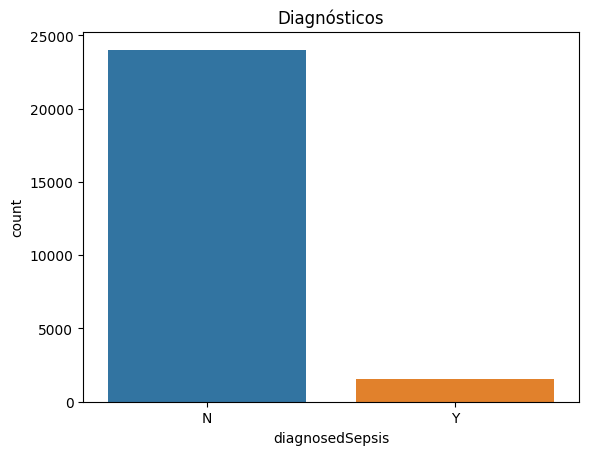

In [22]:
# ver porcentagem dos diagnósticos
print("Diagnósticos:")
print(df.diagnosedSepsis.value_counts() / df.shape[0])

# plotar o gráfico de barras com os diagnósticos
fig, ax = plt.subplots()
sns.countplot(x=df['diagnosedSepsis'])
ax.set_title("Diagnósticos")
plt.show()

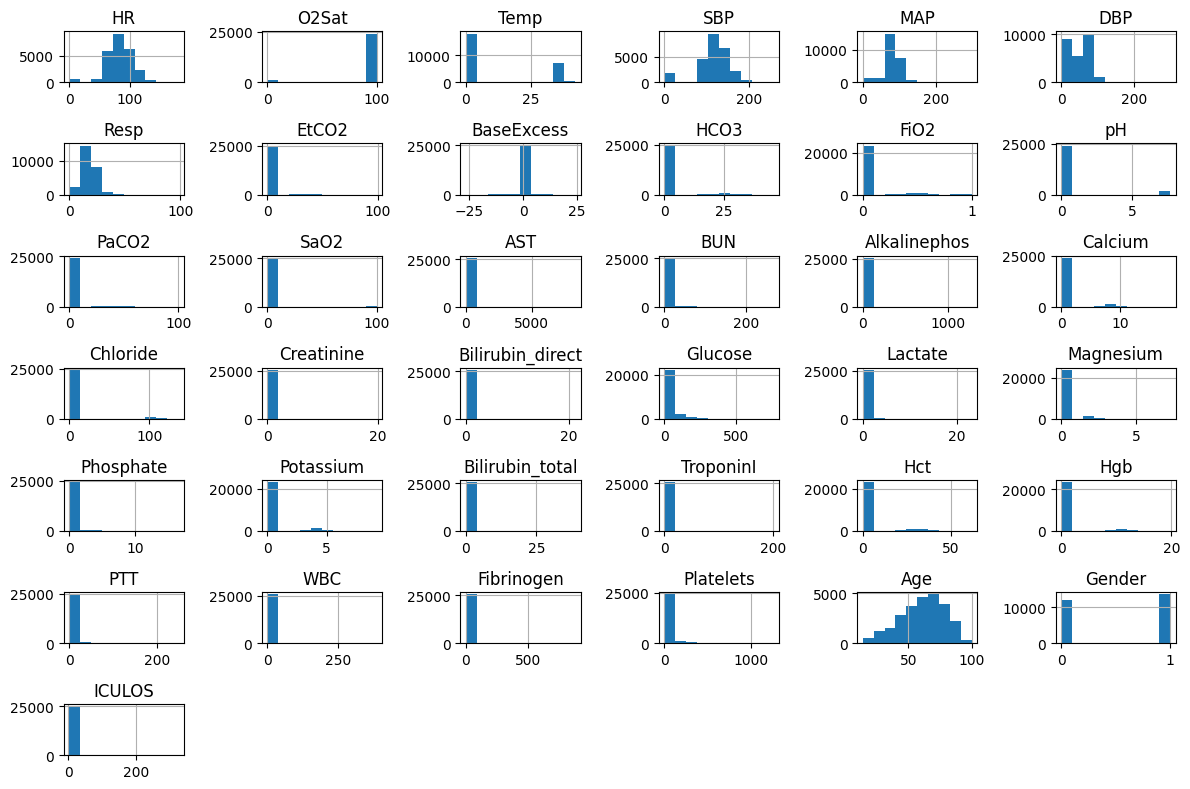

In [23]:
# plotar o histograma das features
fix, ax = plt.subplots(figsize=(12,8))
df.drop(['Patient_ID'], axis=1).hist(ax=ax)
plt.tight_layout()

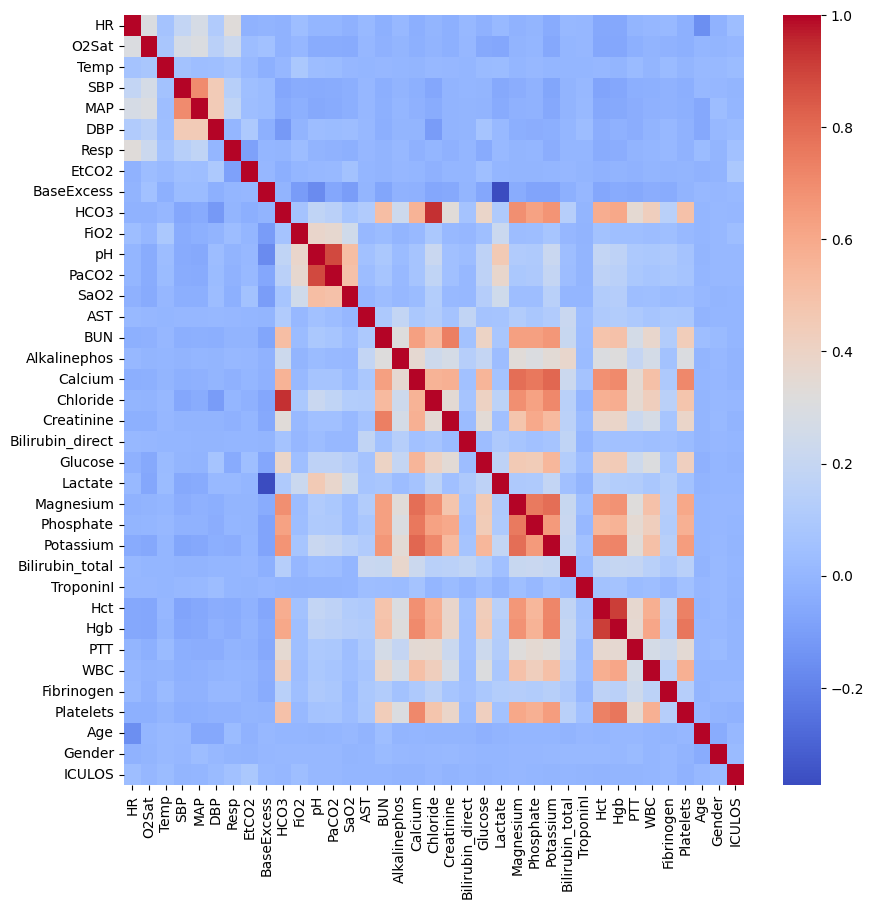

In [24]:
# plotar heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.drop(['Patient_ID'], axis=1).corr(), cmap='coolwarm', ax=ax)
plt.show()

### <div class="alert alert-block alert-warning"><b>Criação de Modelos de Machine Learning</b></div>

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# separar as variáveis independentes da variável alvo
X = df.drop(['diagnosedSepsis', 'Patient_ID'], axis=1)
y = df['diagnosedSepsis']

# padronizar as colunas numéricas
X = StandardScaler().fit_transform(X)

# label encoder na variável alvo
y = LabelEncoder().fit_transform(y)
# label nos resultados
target_names=['Sem sepse (N)', 'Com sepse (Y)']


# random seed.
seed = 10


# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

####
<div class="alert alert-block alert-info">
    <b>Random Forest</b>
</div>

In [26]:
from sklearn.ensemble import RandomForestClassifier

# instanciando o modelo de Random Forest
ml_model = RandomForestClassifier(n_estimators = 10, criterion = 'gini',
                                  random_state = seed)

# treinando o modelo 
ml_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=10)

[Acurácia] Random Forest: 0.9878937776620672

[Classification Report] Random Forest
               precision    recall  f1-score   support

Sem sepse (N)     0.9889    0.9983    0.9936      7247
Com sepse (Y)     0.9672    0.8138    0.8839       435

     accuracy                         0.9879      7682
    macro avg     0.9781    0.9061    0.9388      7682
 weighted avg     0.9877    0.9879    0.9874      7682



Text(0.5, 1.0, 'Matriz confusão')

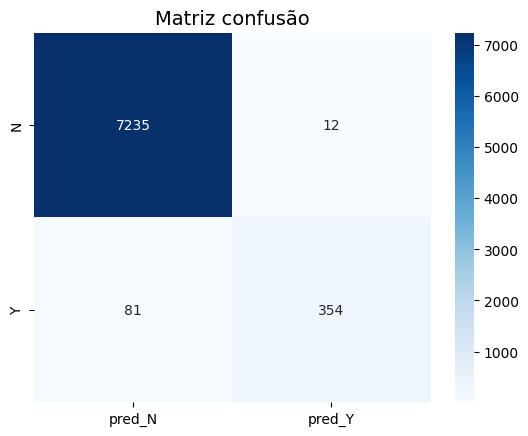

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# realizar as previsões no dataset de teste
y_pred = ml_model.predict(X_test)

# ver acurácia geral
print('[Acurácia] Random Forest:', accuracy_score(y_test, y_pred))

# imprimir o classification report
print('\n[Classification Report] Random Forest')
print( classification_report(y_test, y_pred, digits=4, target_names=target_names))

# plotar a matriz de confusão
matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['N', 'Y'], columns=['pred_N', 'pred_Y'])
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Matriz confusão', fontsize=14)

####
<div class="alert alert-block alert-info">
    <b>Decision Tree</b>
</div>

DecisionTreeClassifier accuracy score: 0.9878937776620672

[Classification Report] DecisionTree
               precision    recall  f1-score   support

Sem sepse (N)     0.9919    0.9953    0.9936      7247
Com sepse (Y)     0.9171    0.8644    0.8899       435

     accuracy                         0.9879      7682
    macro avg     0.9545    0.9298    0.9418      7682
 weighted avg     0.9877    0.9879    0.9877      7682



Text(0.5, 1.0, 'Matriz confusão')

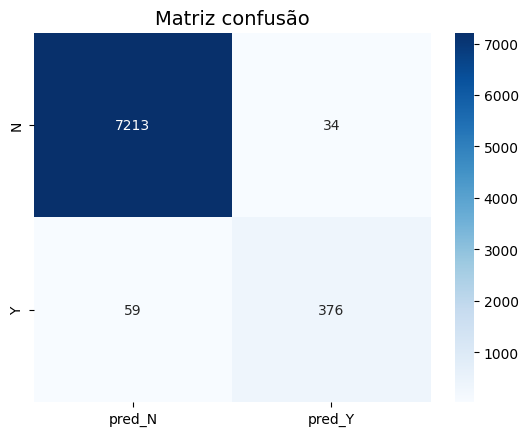

In [28]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(criterion='gini',
                              min_samples_leaf=5,
                              min_samples_split=5,
                              max_depth=None, 
                              random_state=seed)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))
# imprimir o classification report
print('\n[Classification Report] DecisionTree')
print( classification_report(y_test, y_pred, digits=4, target_names=target_names))

# plotar a matriz de confusão
matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['N', 'Y'], columns=['pred_N', 'pred_Y'])
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Matriz confusão', fontsize=14)

####
<div class="alert alert-block alert-info">
    <b>KNN</b>
</div>

KNN accuracy score: 0.9699297058057798

[Classification Report] KNN
               precision    recall  f1-score   support

Sem sepse (N)     0.9699    0.9992    0.9843      7247
Com sepse (Y)     0.9722    0.4828    0.6452       435

     accuracy                         0.9699      7682
    macro avg     0.9710    0.7410    0.8147      7682
 weighted avg     0.9700    0.9699    0.9651      7682



Text(0.5, 1.0, 'Matriz confusão')

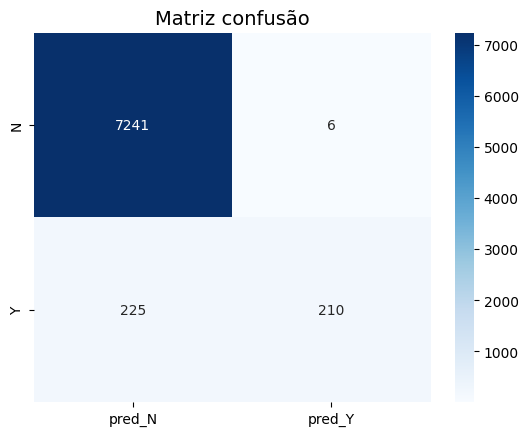

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('KNN accuracy score: {}'.format(accuracy))
# imprimir o classification report
print('\n[Classification Report] KNN')
print(classification_report(y_test, y_pred, digits=4, target_names=target_names))

# plotar a matriz de confusão
matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['N', 'Y'], columns=['pred_N', 'pred_Y'])
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Matriz confusão', fontsize=14)

### <div class="alert alert-block alert-warning"><b>Interpretação dos Resultados</b></div>

In [30]:
# Parâmetros
num_folds = 10
scoring_lst = ['accuracy', 'recall']

# Criação dos modelos
models = []
models.append(('Random Forest', RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = seed)))
models.append(('Decision Tree', DecisionTreeClassifier(criterion='gini', min_samples_leaf=5, min_samples_split=5, 
                                                       max_depth=None, random_state=seed)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Avaliação dos modelos
results = []
names = []
modelos = []
for scoring in scoring_lst:
    for name, model in models:
        kfold = KFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "(%s) %s: %f (%f)" % (scoring, name, cv_results.mean(), cv_results.std())
        modelos.append([scoring, name, cv_results.mean(), cv_results.std()])
        print(msg)
    

(accuracy) Random Forest: 0.987112 (0.004299)
(accuracy) Decision Tree: 0.987503 (0.003199)
(accuracy) KNN: 0.966413 (0.006916)
(recall) Random Forest: 0.793590 (0.066428)
(recall) Decision Tree: 0.853841 (0.053633)
(recall) KNN: 0.411666 (0.048694)


In [32]:
# melhorando a visualização dos resultados
#criando um dataframe
modelos = pd.DataFrame(modelos, columns=['Scoring', 'Modelo', 'Média', 'Desvio Padrão'])
modelos = pd.pivot_table(modelos,
                        index=['Modelo'],
                        columns=['Scoring'],
                        values=['Média', 'Desvio Padrão'],
                        aggfunc=np.sum)
#renomando as colunas
modelos.columns = ['Accuracy std', 'Recall std', 'Accuracy mean', 'Recall mean']
#reordenando as colunas
modelos = modelos[['Accuracy mean', 'Accuracy std', 'Recall mean', 'Recall std']]

In [33]:
# visualizando os resultados por ordem de acurárcia e recall
modelos.sort_values(['Accuracy mean', 'Recall mean'], ascending=False)


,Accuracy mean,Accuracy std,Recall mean,Recall std
Modelo,,,,
Decision Tree,0.987503,0.003199,0.853841,0.053633
Random Forest,0.987112,0.004299,0.793590,0.066428
KNN,0.966413,0.006916,0.411666,0.048694


[Text(0.5, 1.0, 'Acurácia'), Text(0.5, 0, 'Model'), Text(0, 0.5, 'Score')]

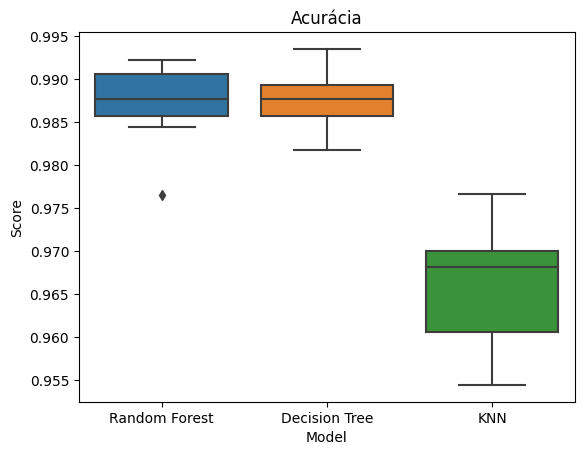

In [34]:

nomes = ['Random Forest', 'Decision Tree', 'KNN']

#acuracia
valores = []
for i in range(3):
    for j in np.transpose(results[i:i+1]):
        valores.append([j[0], nomes[i]])
        
valores = pd.DataFrame(valores, columns=['Acuracia', 'Modelo'])  
sns.boxplot(data=valores, x='Modelo', y='Acuracia').set(title='Acurácia', xlabel="Model", ylabel="Score")

[Text(0.5, 1.0, 'Recall'), Text(0.5, 0, 'Model'), Text(0, 0.5, 'Score')]

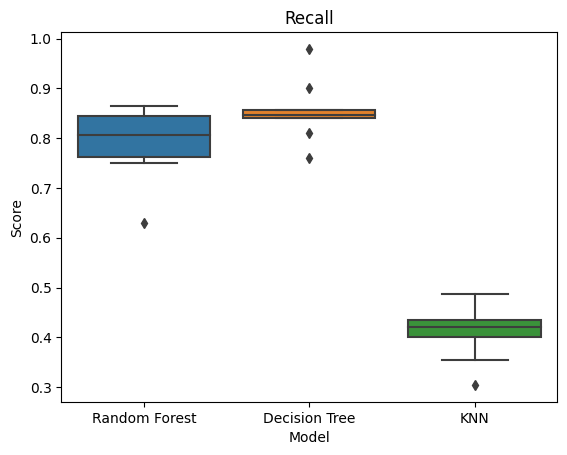

In [35]:
valores = []
for i in range(3):
    for j in np.transpose(results[i+3:i+4]):
        valores.append([j[0], nomes[i]])
        
valores = pd.DataFrame(valores, columns=['Recall', 'Modelo'])  
sns.boxplot(data=valores, x='Modelo', y='Recall').set(title='Recall', xlabel="Model", ylabel="Score")

### <div class="alert alert-block alert-warning"><b>Aplicação do melhor modelo</b></div>

DecisionTreeClassifier accuracy score: 0.9496426790759515

[Classification Report] DecisionTree
               precision    recall  f1-score   support

Sem sepse (N)     0.9957    0.9517    0.9732     11553
Com sepse (Y)     0.4369    0.9002    0.5883       481

     accuracy                         0.9496     12034
    macro avg     0.7163    0.9260    0.7807     12034
 weighted avg     0.9733    0.9496    0.9578     12034



Text(0.5, 1.0, 'Matriz confusão')

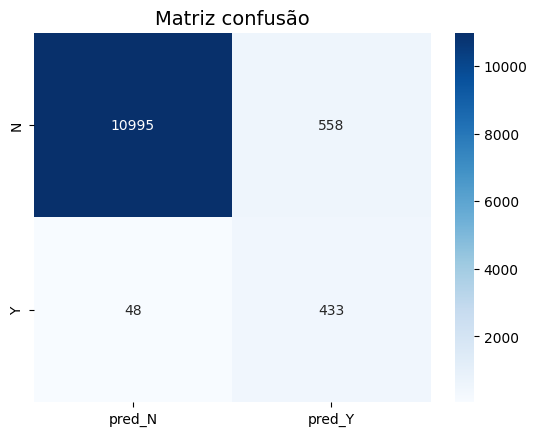

In [36]:
X = df_u2.drop(['diagnosedSepsis', 'Patient_ID'], axis=1)
y = df_u2['diagnosedSepsis']

# padronizar as colunas numéricas
X = StandardScaler().fit_transform(X)

# label encoder na variável alvo
y = LabelEncoder().fit_transform(y)

y_pred = tree.predict(X)
accuracy = accuracy_score(y, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))
# imprimir o classification report
print('\n[Classification Report] DecisionTree')
print(classification_report(y, y_pred, digits=4, target_names=target_names))

# plotar a matriz de confusão
matrix = pd.DataFrame(confusion_matrix(y, y_pred), index=['N', 'Y'], columns=['pred_N', 'pred_Y'])
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Matriz confusão', fontsize=14)